In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML

In [2]:
class ito:
    def __init__(self, a, b, dt, mu, sig, x0=0):
        self.a = a
        self.b = b
        self.dt = dt
        self.mu = mu
        self.sig = sig
        self.x0 = x0
    def generate(self):
        xlim = 10
        lnspc = [self.a]
        cur_t = self.a
        dx = [self.x0]
        cur_x = self.x0
        while (np.abs(cur_x) < xlim) and (cur_t<=self.b):
            cur_t += self.dt
            lnspc.append(cur_t)
            dx.append((self.mu(cur_x, cur_t) * self.dt) + (self.sig(cur_x, cur_t) * np.random.normal(0, 1)*np.sqrt(self.dt)))
            cur_x += dx[-1]
            yield (np.array(lnspc), np.array(dx), np.cumsum(dx))

In [3]:
class Anim():
    def __init__(self, ax, ymin, ymax, count = 0):
        self.count = count
        self.ax = ax
        self.ymin = ymin
        self.ymax = ymax
        self.itos = []
        self.lines = []
        
            
    def lines_gen(self):
        for i in range(self.count):
            line, = self.ax.plot([], [])
            self.lines.append(line)
            
            
    def ito_gen(self, a, b, dt, mu, sig, x0=0):
        for i in range(self.count):
            self.itos.append(ito(a, b, dt, (lambda x, t: 0), (lambda x, t: 1), x0).generate())
    
    
    def init_anim(self):
        vals = map(next, self.itos)
        for (line), (xx, _, yy) in zip(self.lines, vals):
            line.set_data(xx, yy)
        return self.lines
    
    
    def animate(self, i):
        try:
            vals = map(next, self.itos)
            for (line), (xx, _, yy) in zip(self.lines, vals):
                line.set_data(xx, yy)
                if yy[-1] < self.ymin:
                    self.ymin = yy[-1]
                if yy[-1] > self.ymax:
                    self.ymax = yy[-1]
            
            max_x = xx[-1]
            self.ax.set_xlim(0, max_x)
            self.ax.set_ylim(self.ymin, self.ymax)
            return self.lines
        except StopIteration:
            pass
        
        
    def add_generator(self, gen):
        line, = self.ax.plot([], [])
        self.lines.append(line)
        self.itos.append(gen)
        self.count += 1

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


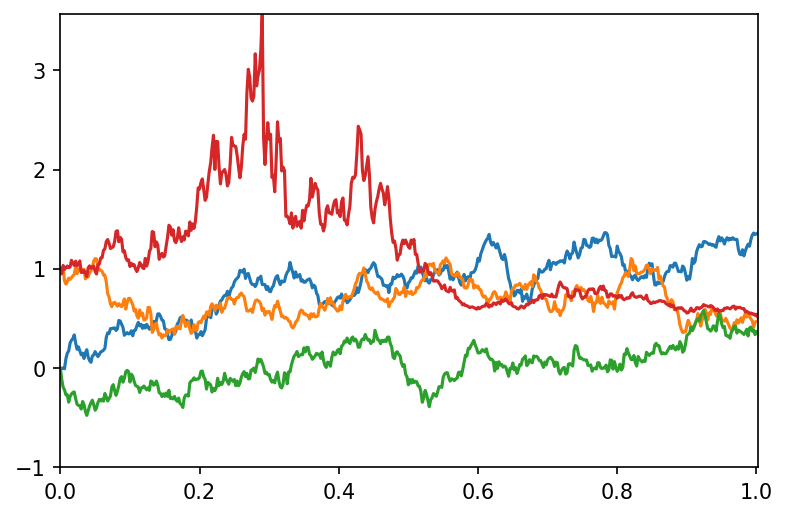

In [4]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(ylim=(-1, 3))

dt = 2/1000
a=0
b=2
mu1 = (lambda x, t: 0)
sig1 = (lambda x, t: 1)

mu2 = lambda x, t: 1
sig2 = lambda x, t: 1

mu3 = lambda x, t: 0
sig3 = lambda x, t: x**2

g1 = ito(a, b, dt, mu1, sig1, 0).generate()
g2 = ito(a, b, dt, mu1, sig1, 1).generate()
g3 = ito(a, b, dt, mu2, sig2, 0).generate()
g4 = ito(a, b, dt, mu3, sig3, 1).generate()

anim = Anim(ax, -1, 3)
#anim.lines_gen()
#anim.ito_gen(a, b, dt, mu1, sig1)
anim.add_generator(g1)
anim.add_generator(g2)
anim.add_generator(g3)
anim.add_generator(g4)


animation = FuncAnimation(fig, anim.animate, init_func=anim.init_anim,
                          frames=500, interval=20
                         )
animation.save('animation.gif')